# Project: Loan Data From Prosper
## by Olatunde Ashiru

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Preliminary Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

On November 24, 2008, the SEC found Prosper to be in violation of the Securities Act of 1933. As a result of these findings, the SEC imposed a cease and desist order on Prosper ... In July 2009, Prosper reopened their website for lending ("investing") and borrowing after having obtained SEC registration for its loans ("notes"). After the relaunch, bidding on loans was restricted to residents of 28 U.S. states and the District of Columbia. Borrowers may reside in any of 47 states, with residents of three states (Iowa, Maine, and North Dakota) not permitted to borrow through Prosper.<br><br>
This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.<br><br>



This [data](https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0) dictionary explains the variables in the data set.We didn't explore all of the variables in the dataset! We focus our exploration on about 10-15 of them. 

### Question(s) for Analysis
1. What factors affect a loan’s outcome status?
2. What affects the borrower’s APR or interest rate?


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

<a id='wrangling'></a>
## Preliminary Wrangling

Assessing the dataset for the number of rows and columns_, as well as the data types in each _column. Loading the dataset and printing out a few lines. As well as performing operations to inspect the dataset. Finding data types and looking for instances of missing or possibly errant data.

In [2]:
# Loading the data and printing out a few lines. Performing operations to inspect data
#   Finding types and looking for instances of missing or possibly errant data.
loan_df = pd.read_csv('prosperLoanData.csv')
loan_df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,09:29.3,C,36,Completed,8/14/2009 0:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,28:07.9,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,00:47.1,HR,36,Completed,12/17/2009 0:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,02:35.0,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,38:39.1,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


### Investigating the structure of the dataset

In [3]:
# Investigating the number of rows and column in the dataset

loan_df.shape

(113937, 81)

In [4]:
#Checking for if there exist a row with a NaN entry 
# And data types of each column in the dataset
loan_df.isnull().sum()

ListingKey                         0
ListingNumber                      0
ListingCreationDate                0
CreditGrade                    84984
Term                               0
                               ...  
PercentFunded                      0
Recommendations                    0
InvestmentFromFriendsCount         0
InvestmentFromFriendsAmount        0
Investors                          0
Length: 81, dtype: int64

In [5]:
## Checking if there are duplicate enteries in the dataset

loan_df.duplicated().sum()

0

In [6]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

In [7]:
# Checking the values in the ProsperRating (numeric) and ProsperRating (Alpha) columns

print(loan_df['ProsperRating (numeric)'].value_counts())
print('\n')
print(loan_df['ProsperRating (Alpha)'].value_counts())

4.0    18345
5.0    15581
6.0    14551
3.0    14274
2.0     9795
1.0     6935
7.0     5372
Name: ProsperRating (numeric), dtype: int64


C     18345
B     15581
A     14551
D     14274
E      9795
HR     6935
AA     5372
Name: ProsperRating (Alpha), dtype: int64


In [8]:
# convert ProsperRating and ProsperScore into ordered categorical types

ordinal_var_dict = {'ProsperRating (Alpha)': ['HR','E','D','C','B', 'A', 'AA'],
                    'ProsperScore': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    loan_df[var] = loan_df[var].astype(ordered_var)

In [9]:
# Making a copy of the dataset before wrangling
loan_copy = loan_df.copy()

In [10]:
#Replacing the '/' and '.' with '-'and ':' respectively
# in the ClosedDate and DateCreditPulled

rep_columns_value = ['ClosedDate','DateCreditPulled']
loan_copy['ClosedDate'] = loan_copy['ClosedDate'].str.replace('/','-')
loan_copy['DateCreditPulled'] = loan_copy['DateCreditPulled'].str.replace('/','-')

In [11]:
# Setting a date format entry from the ClosedDate and DateCreditPulled Column

loan_copy['ClosedDate'] = loan_copy['ClosedDate'].str.split().str[0]
loan_copy['DateCreditPulled'] = loan_copy['DateCreditPulled'].str.split().str[0]

In [12]:
#Selecting the month, day and year from the date format entry


loan_copy['ClosedMonth'] = loan_copy['ClosedDate'].astype(str).str.extract(r'^(\d{1,2})', expand=False) 
loan_copy['ClosedDay'] = loan_copy['ClosedDate'].astype(str).str.extract(r'-(\d{1,2})-', expand=False)  
loan_copy['ClosedYear'] = loan_copy['ClosedDate'].astype(str).str.extract(r'^.*-(\d{4})', expand=False)

In [13]:
# Setting a date format entry from the ClosedDate and DateCreditPulled Column
#Selecting the month, day and year from the date format entry
#for cols in ['ClosedDate', 'DateCreditPulled']:
    # change date from string to datetime variable
 #   loan_copy[cols] = pd.to_datetime(loan_copy[cols])
    
    # extract date information from datetime variable
 #   loan_copy[f'{cols}_date_new'] = loan_copy[cols].dt.date
 #   loan_copy[f'{cols}_year_new'] = loan_copy[cols].dt.year
 #   loan_copy[f'{cols}_month_new'] = loan_copy[cols].dt.month
  #  loan_copy[f'{cols}_monthname_new'] = loan_copy[cols].dt.strftime("%B")
 #   loan_copy[f'{cols}_day_new'] = loan_copy[cols].dt.day
  #  loan_copy[f'{cols}_dayname_new'] = loan_copy[cols].dt.strftime("%A")
   # loan_copy[f'{cols}_time_new'] = loan_copy[cols].dt.time

#loan_copy[[x for x in loan_copy.columns if "new" in x]]

In [14]:
# Checking the first five enteries of the copied dataset
loan_copy.head(5)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,ClosedMonth,ClosedDay,ClosedYear
0,1021339766868145413AB3B,193129,09:29.3,C,36,Completed,8-14-2009,0.16516,0.1580,0.1380,...,0.0,0.0,1.0,0,0,0.0,258,8,14,2009
1,10273602499503308B223C1,1209647,28:07.9,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.0,0.0,1.0,0,0,0.0,1,NaN,NaN,NaN
2,0EE9337825851032864889A,81716,00:47.1,HR,36,Completed,12-17-2009,0.28269,0.2750,0.2400,...,0.0,0.0,1.0,0,0,0.0,41,12,17,2009
3,0EF5356002482715299901A,658116,02:35.0,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,0.0,0.0,1.0,0,0,0.0,158,NaN,NaN,NaN
4,0F023589499656230C5E3E2,909464,38:39.1,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,0.0,0.0,1.0,0,0,0.0,20,NaN,NaN,NaN


### What is the structure of the dataset?

> There are 113937 entry in the dataset with 81 features best explained by the [data dictionary](https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0) . Most variables are numeric in nature, but the variables ProsperRating are ProsperScore are ordered factor variables with the following levels.

(worst) ——> (best) <br>
ProsperRating: HR, E, D, C, B, A, AA <br>
ProsperScore: 1, 2, 3, 4, 5, 6, 7, 8, 9, 10 <br>

### What is/are the main feature(s) of interest in the dataset?
> I'm most interested in figuring out what features are best for predicting the Loan status of borrowers in the dataset.


### What features in the dataset do I think will help support my investigation into your feature(s) of interest?
> I expect that the following features `BorrowerAPR`, `BorrowerRate` and `LenderYield`, will have the strongest effect on each LoanStatus of Borrowers: the lesser these fees, the lesser the debtors. I also think that the following features; `ListingCategory`, `Occupation`, `EmploymentStatus`, `IsBorrowerHomeowner`, `DebtToIncomeRatio`, `IncomeRange`, `IncomeVerifiable`, `StatedMonthlyIncome`, and `Recommendations` will have effects on the Loan Status.

In [15]:
# Creating a data frame of features that I think
# will best support my investigation.

# list of supporting features
support_feats = ['LoanStatus','BorrowerAPR','BorrowerRate','LenderYield','ListingCategory (numeric)',
                 'Occupation','EmploymentStatus','IsBorrowerHomeowner','DebtToIncomeRatio', 
                 'IncomeRange', 'IncomeVerifiable', 'StatedMonthlyIncome','Recommendations']

loan_support_df = loan_copy[support_feats]

In [16]:
loan_support_df.head(3)

,LoanStatus,BorrowerAPR,BorrowerRate,LenderYield,ListingCategory (numeric),Occupation,EmploymentStatus,IsBorrowerHomeowner,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,Recommendations
0,Completed,0.16516,0.158,0.138,0,Other,Self-employed,True,0.17,"$25,000-49,999",True,3083.333333,0
1,Current,0.12016,0.092,0.082,2,Professional,Employed,False,0.18,"$50,000-74,999",True,6125.000000,0
2,Completed,0.28269,0.275,0.240,0,Other,Not available,False,0.06,Not displayed,True,2083.333333,0


In [17]:
# Checking the data types of each variables in the supporting dataset
loan_support_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 13 columns):
LoanStatus                   113937 non-null object
BorrowerAPR                  113912 non-null float64
BorrowerRate                 113937 non-null float64
LenderYield                  113937 non-null float64
ListingCategory (numeric)    113937 non-null int64
Occupation                   110349 non-null object
EmploymentStatus             111682 non-null object
IsBorrowerHomeowner          113937 non-null bool
DebtToIncomeRatio            105383 non-null float64
IncomeRange                  113937 non-null object
IncomeVerifiable             113937 non-null bool
StatedMonthlyIncome          113937 non-null float64
Recommendations              113937 non-null int64
dtypes: bool(2), float64(5), int64(2), object(4)
memory usage: 9.8+ MB


In [18]:
# Dropping the Nan Values
loan_support_df.dropna(inplace = True)

In [19]:
# Checking the supporting dataset after droping Nan Values
loan_support_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101824 entries, 0 to 113936
Data columns (total 13 columns):
LoanStatus                   101824 non-null object
BorrowerAPR                  101824 non-null float64
BorrowerRate                 101824 non-null float64
LenderYield                  101824 non-null float64
ListingCategory (numeric)    101824 non-null int64
Occupation                   101824 non-null object
EmploymentStatus             101824 non-null object
IsBorrowerHomeowner          101824 non-null bool
DebtToIncomeRatio            101824 non-null float64
IncomeRange                  101824 non-null object
IncomeVerifiable             101824 non-null bool
StatedMonthlyIncome          101824 non-null float64
Recommendations              101824 non-null int64
dtypes: bool(2), float64(5), int64(2), object(4)
memory usage: 9.5+ MB


<a id='eda'></a>
## Exploratory Data Analysis

## Univariate Exploration


I'll start by looking at the distribution of the main variable of interest: loan status

### Find the frequency of unique values in `LoanStatus` column

In [20]:
# Count the frequency of unique values in the `LoanStatus` column of loan_support dataframe. 
# By default, returns the decreasing order of the frequency.

loan_status_count = loan_support_df['LoanStatus'].value_counts()
loan_status_count

Current                   51174
Completed                 33906
Chargedoff                10463
Defaulted                  4249
Past Due (1-15 days)        714
Past Due (31-60 days)       322
Past Due (91-120 days)      277
Past Due (61-90 days)       275
Past Due (16-30 days)       241
FinalPaymentInProgress      187
Past Due (>120 days)         14
Cancelled                     2
Name: LoanStatus, dtype: int64

In [21]:
# Get the unique values of the `LoanStatus` column, in the decreasing order of the frequency.
loan_status_order = loan_status_count.index
loan_status_order

Index(['Current', 'Completed', 'Chargedoff', 'Defaulted',
       'Past Due (1-15 days)', 'Past Due (31-60 days)',
       'Past Due (91-120 days)', 'Past Due (61-90 days)',
       'Past Due (16-30 days)', 'FinalPaymentInProgress',
       'Past Due (>120 days)', 'Cancelled'],
      dtype='object')

### Creating a new `LoanStatus_new` variable

In [22]:
# Creating a new LoanStatus_new variable
loan_support_df['LoanStatus_new'] = loan_support_df['LoanStatus'].astype(str)

# rows that contain "Past Due"
mask = loan_support_df['LoanStatus_new'].str.contains('Past Due')

# Changing those values to "Past Due"
loan_support_df.loc[mask,'LoanStatus_new'] = "Past Due"

In [23]:
# LoanStatus_new_order from the newly created  LoanStatus_new variable by default

loan_status_new_count = loan_support_df['LoanStatus_new'].value_counts()
loan_status_order_new = loan_status_new_count.index
loan_status_order_new

Index(['Current', 'Completed', 'Chargedoff', 'Defaulted', 'Past Due',
       'FinalPaymentInProgress', 'Cancelled'],
      dtype='object')

#### Ploting Horizontal bar for the LoanStatus 

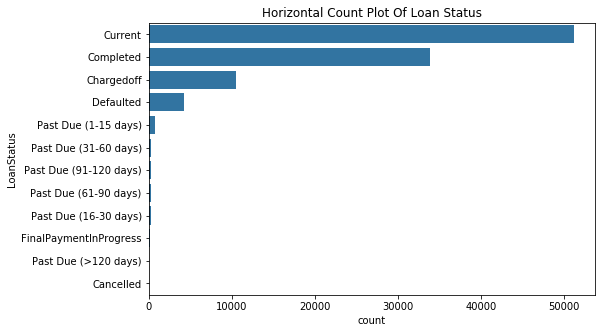

In [24]:
# Using standard scale on the 'count' axes for the original 'LoanStatus' variable

base_color = sb.color_palette()[0]
plt.figure(figsize=[8, 5])
sb.countplot(data=loan_support_df, y='LoanStatus', color=base_color, order=loan_status_order)
plt.title('Horizontal Count Plot Of Loan Status');
#plt.xscale('log')
#plt.xticks([10e0, 10e1, 10e2, 10e3,10e4], [1, 10, 100, 1000, 10000]);

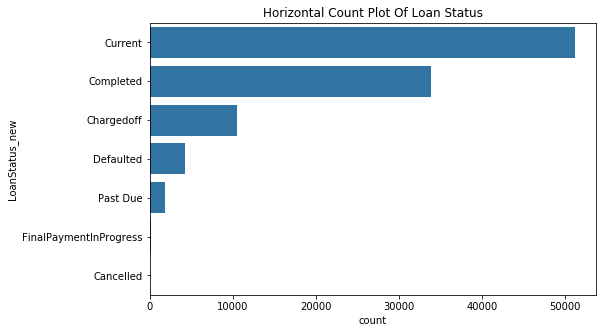

In [25]:
# Using Standard scale on the 'count' axes
# For the 'LoanStatus_new' variable
base_color = sb.color_palette()[0]
plt.figure(figsize=[8, 5])
sb.countplot(data=loan_support_df, y='LoanStatus_new', color=base_color, order=loan_status_order_new)
plt.title('Horizontal Count Plot Of Loan Status');

From the above plots, we can easily see that Borrowers who falls under the "Current" Loan Status are much more than the other classes in the dataset. A good percentage of borrowers has also completed their payment terms. Slightly above 10,000 borrowers have defaulted. And people whose loan term has past their due date are very small in proportion.

Next is to check the distribution of the BorrowerAPR, BorrowerRate and LenderYield variables, to see if there're any outliers.

In [26]:
# Statistical distribution of BorrowerAPR
loan_support_df['BorrowerAPR'].describe()

count    101824.000000
mean          0.216719
std           0.079786
min           0.006530
25%           0.154280
50%           0.207300
75%           0.277760
max           0.423950
Name: BorrowerAPR, dtype: float64

### Exploring `Borrower APR` column

In [27]:
def myHistPlot(df, xVar, interval, figsize =[14,6], title=''):
    ''' A Function To Creat Histogram Plot
    '''
    # Set intervals for bins 
    bins = np.arange(df[xVar].min(), df[xVar].max()+interval, interval)
    
    #plot
    df[xVar].hist(bins =bins, grid=False,edgecolor='black',figsize=figsize);
    
    # for labels, add a space instead of underscore
    xVar = xVar.replace("_", " ")
    
    # Add title and format it
    plt.title(f'Distribution of {xVar} {title}'.title(), fontsize = 14, weight = "bold")
    
    # Add x label and format it
    plt.xlabel(xVar.title(), fontsize = 10, weight = "bold")
    
    # Add y label and format it
    plt.ylabel('Frequency'.title(), fontsize = 10, weight = "bold")

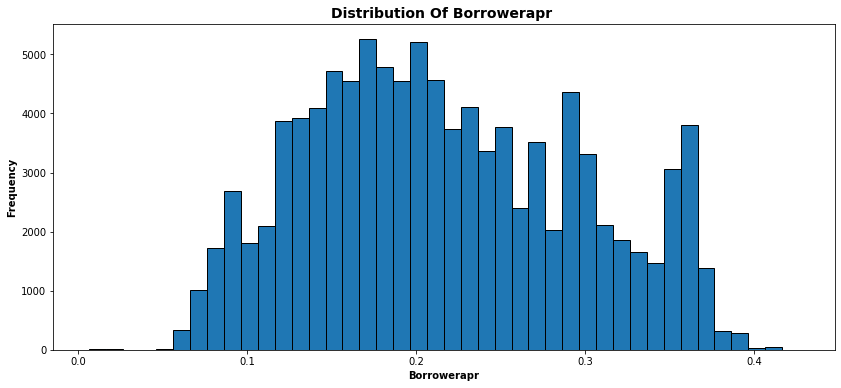

In [28]:
# Call plot function on 'BorrowerAPR'(using all data)
myHistPlot(loan_support_df,'BorrowerAPR', 0.01)

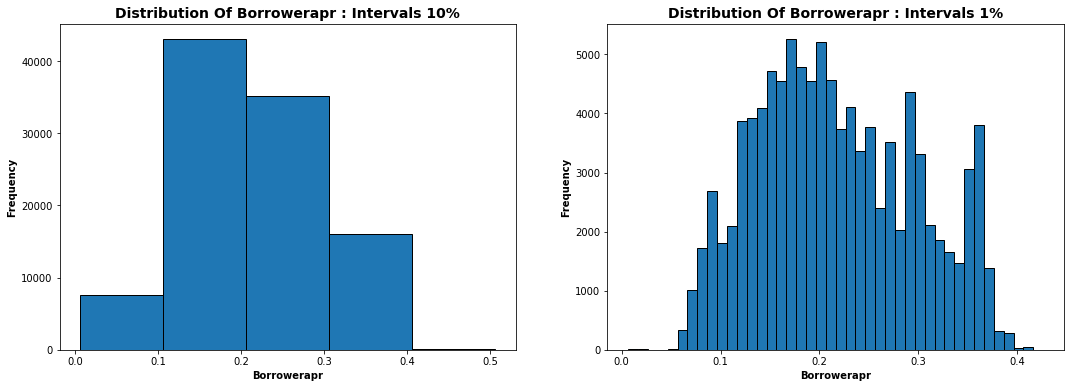

In [29]:
# Plotting BorrowerAPR on a standard scale

plt.figure(figsize=[18, 6])
plt.subplot(1, 2, 1)
myHistPlot(loan_support_df,'BorrowerAPR',0.1, figsize=None, title =': Intervals 10%')



# investigating `BorrowerAPR' further on an even smaller bin size
plt.subplot(1, 2, 2)
myHistPlot(loan_support_df,'BorrowerAPR',0.01, figsize=None, title =': Intervals 1%')
plt.show();

The distribution of the Borrower APR looks bimodal, with the small bin size proves very illuminating. There is a very large spike in frequency at occuring at bars between 0.09 to 0.2); with the largest spike at 0.17. These probably represent standard Annual Percentage Rates that determines the `LoanStatus`  class of a borrower.

I'll now move on to the Borrower Rates and Lender Yield

### Exploring `Borrower Rate` column

In [30]:
# Statistical distribution of Borrower Rate
loan_support_df['BorrowerRate'].describe()

count    101824.000000
mean          0.190827
std           0.074300
min           0.000000
25%           0.131400
50%           0.180000
75%           0.249200
max           0.360000
Name: BorrowerRate, dtype: float64

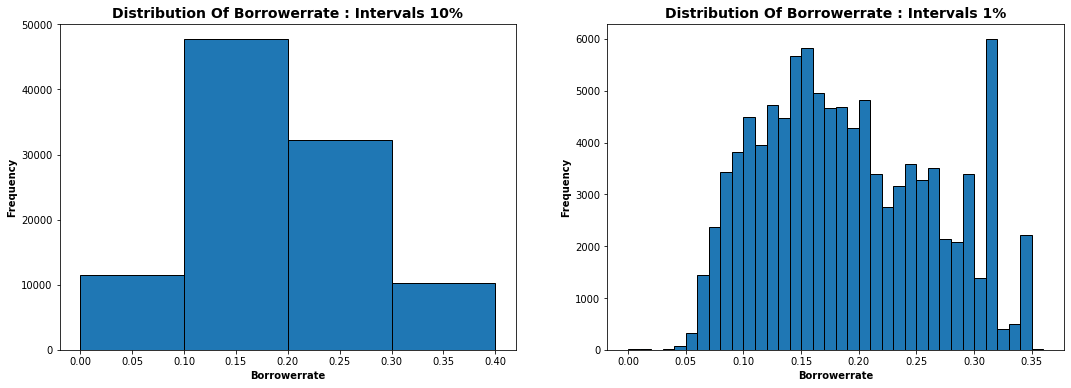

In [31]:
# Plotting BorrowerRate on a standard scale


plt.figure(figsize=[18, 6])
plt.subplot(1, 2, 1)
myHistPlot(loan_support_df,'BorrowerRate',0.1, figsize=None, title =': Intervals 10%')



# investigating `BorrowerAPR' further on an even smaller bin size
plt.subplot(1, 2, 2)
myHistPlot(loan_support_df,'BorrowerRate',0.01, figsize=None, title =': Intervals 1%')

The distribution of the Borrower Rate looks partially normal on the small bin size. There are large spikes in frequency at the bars between 0.1 to 0.21. There also occur a very large spike at 0.32. These probably represent standard Interest Rates that might determine the `LoanStatus` of a borrower .

I'll now move on to the Lender Yield

### Exploring `Lender Yield` column

In [32]:
# Statistical distribution of LenderYield
loan_support_df['LenderYield'].describe()

count    101824.000000
mean          0.180733
std           0.073996
min          -0.010000
25%           0.121400
50%           0.170000
75%           0.239200
max           0.340000
Name: LenderYield, dtype: float64

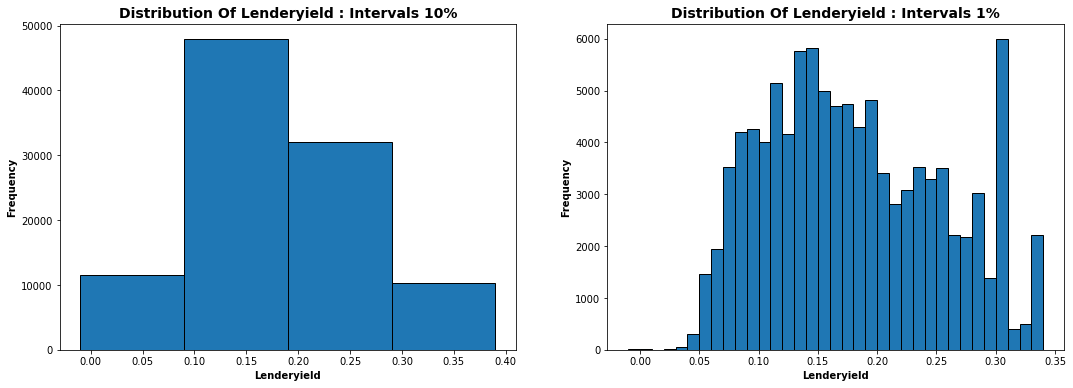

In [33]:
# Plotting LenderYield on a standard scale


plt.figure(figsize=[18, 6])
plt.subplot(1, 2, 1)
myHistPlot(loan_support_df,'LenderYield',0.1, figsize=None, title =': Intervals 10%')



# investigating `BorrowerAPR' further on an even smaller bin size
plt.subplot(1, 2, 2)
myHistPlot(loan_support_df,'LenderYield',0.01, figsize=None, title =': Intervals 1%')

The distribution of the Lender Yield on small bin size is similar to that of the `BorrowerAPR` and `BorrowerRate` variables. There is a very large spike in frequency at the bars e.g (0.07, 0.10, 0.14,0.15, 0.20); with the largest spike at around 0.31. These probably represent standard Lender Yield that might facilitate the ease or non-ease of loan payment.

I'll now move on to the Employment Status

### Employement Status

In [34]:
# Count the frequency of unique values in the `EmploymentStatus` column of loan_support dataframe. 
# By default, returns the decreasing order of the frequency.

employment_status_count = loan_support_df['EmploymentStatus'].value_counts()
employment_status_count

Employed         65896
Full-time        25590
Not available     5252
Other             2194
Self-employed     1092
Part-time          969
Retired            735
Not employed        96
Name: EmploymentStatus, dtype: int64

In [35]:
# Get the unique values of the `Employment Status` column, in the decreasing order of the frequency.
employment_status_order = employment_status_count.index

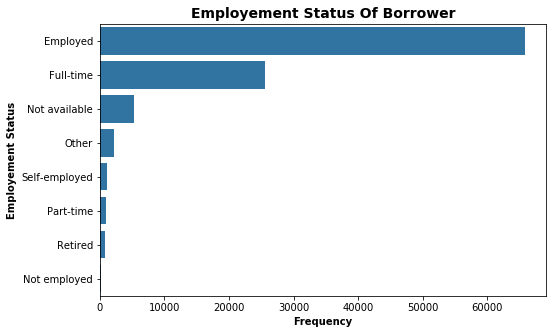

In [36]:
# Using standard scale on the 'count' axes for Borrower's Employement status
base_color = sb.color_palette()[0]
plt.figure(figsize=[8, 5])
sb.countplot(data=loan_support_df, y='EmploymentStatus', color=base_color, order=employment_status_order)
plt.title('Employement Status Of Borrower', fontsize=14, weight="bold")
plt.xlabel('Frequency', fontsize=10, weight="bold")
plt.ylabel('Employement Status', fontsize=10, weight="bold");

The above plot suggest that Prosper give out more loans to people who are employed and working full time compared to others, which is a sensible thing to do. For they have more potential to pay back the loans.

### Exploring `DebtToIncomeRatio` column

In [37]:
# Statistical description of the DebtToIncomeRatio variable

loan_support_df['DebtToIncomeRatio'].describe()

count    101824.000000
mean          0.277591
std           0.555220
min           0.000000
25%           0.150000
50%           0.220000
75%           0.320000
max          10.010000
Name: DebtToIncomeRatio, dtype: float64

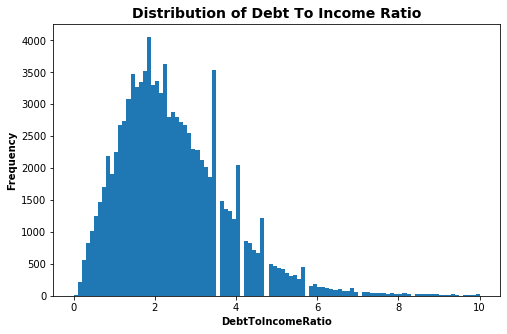

In [38]:
# investigating Debt To Income Ratio with smaller bin size
binsize = 0.01
bins = np.arange(0, loan_support_df['DebtToIncomeRatio'].max()*0.1, 0.01)

plt.figure(figsize=[8, 5])
plt.hist(data = loan_support_df, x = 'DebtToIncomeRatio', bins = bins)
plt.title('Distribution of Debt To Income Ratio', fontsize=14, weight="bold")
plt.xlabel('DebtToIncomeRatio', fontsize=10, weight ="bold")
plt.ylabel('Frequency', fontsize = 10, weight = "bold")
plt.xticks([0, 0.2, 0.4, 0.6, 0.8, 1.0], [0, 2, 4, 6, 8, 10])
plt.show();

The Debt to Income Ratio looks slightly skewed to the right on a smaller bin size with gaps occuring intermittently  from 3 to 10. This gaps shows thier might be outliers within this range.

### Exploring `StatedMonthlyIncome` column

In [39]:
# Investigating the statistical distribution of StatedMonthlyIncome column
loan_support_df['StatedMonthlyIncome'].describe()

count    101824.000000
mean       5685.932536
std        4975.261966
min           0.000000
25%        3333.333333
50%        4801.958334
75%        6916.666667
max      483333.333300
Name: StatedMonthlyIncome, dtype: float64

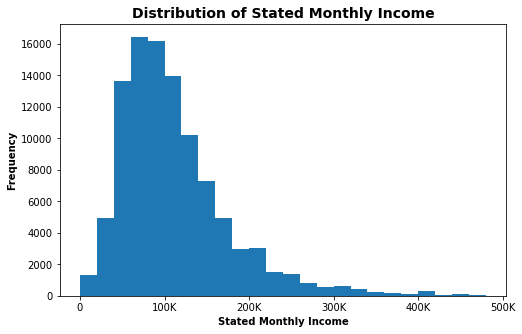

In [42]:
# investigating StatedMonthlyIncome with small bin size
binsize = 0.01
bins = np.arange(0, loan_support_df['StatedMonthlyIncome'].max()*0.05, 1000)

plt.figure(figsize=[8, 5])
plt.hist(data = loan_support_df, x = 'StatedMonthlyIncome', bins = bins)
plt.xlabel('StatedMonthlyIncome')
plt.xticks([0, 5000, 10000, 15000, 20000, 25000], [0, '100K', '200K', '300K', '400K', '500K'])
plt.title('Distribution of Stated Monthly Income', fontsize=14, weight="bold")
plt.xlabel('Stated Monthly Income', fontsize=10, weight="bold")
plt.ylabel('Frequency', fontsize=10, weight="bold")
plt.show();

The above plot shows that the distribution Stated Monthly income of borrowers is skewed to the right, with majority of borrowers earning between 0 to 200K Dollars, 0 to 100K Dollars being the categories where most borrowers fall, followed closely by earners between 100K to 200K Dollars, which might tell us that low income earners are those that borrowed most.

Next is the `IncomeRange` of Borrowers

### Exploring `IncomeRange` column

In [43]:
# Count the frequency of unique values in the `IncomeRange` column of loan_support dataframe. 
# By default, returns the decreasing order of the frequency.

income_range_count = loan_support_df['IncomeRange'].value_counts()
income_range_count 

$25,000-49,999    29280
$50,000-74,999    29026
$100,000+         16032
$75,000-99,999    15918
$1-24,999          6099
Not displayed      5391
Not employed         78
Name: IncomeRange, dtype: int64

In [44]:
# Get the unique values of the `IncomeRange` column, in the decreasing order of the frequency.
income_order = income_range_count.index

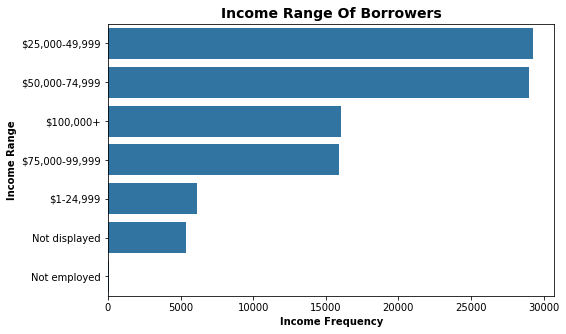

In [45]:
# Ploting the the count of the income range 
# Using standard scale on the 'count' axes for Borrower's Nature of Job

base_color = sb.color_palette()[0]
plt.figure(figsize=[8, 5])
sb.countplot(data=loan_support_df, y='IncomeRange', color=base_color, order=income_order)
plt.title('Income Range Of Borrowers', fontsize=14, weight="bold")
plt.xlabel('Income Frequency', fontsize =10, weight="bold")
plt.ylabel('Income Range', fontsize =10, weight="bold");

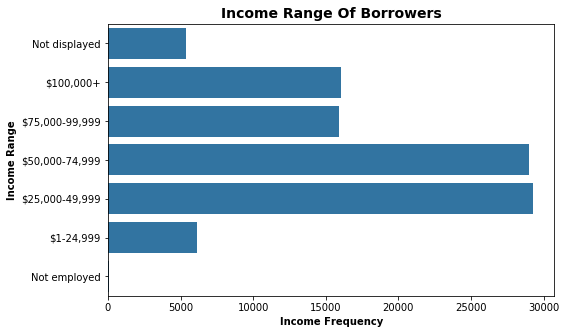

In [46]:
# Creating income_order_new
income_order_new =['Not employed', '$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999','$100,000+','Not displayed'][::-1]

# Ploting the the count of the income range 
# Using standard scale on the 'count' axes for Borrower's Nature of Job
# setting 'order' as income_order_new
base_color = sb.color_palette()[0]
plt.figure(figsize=[8, 5])
sb.countplot(data=loan_support_df, y='IncomeRange', color=base_color, order=income_order_new)
plt.title('Income Range Of Borrowers', fontsize=14, weight="bold")
plt.xlabel('Income Frequency', fontsize =10, weight="bold")
plt.ylabel('Income Range', fontsize =10, weight="bold");

The count plot shows that the Monthly Income range, which reveals that borrowers earnng in the region of '$25,000 - 49,999' and '$50,000 - 74,999 have the highest frequency. This seems to confirm with the distribution of the `StatedMonthlyIncome` column

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?
> The loan status outcome count shows that more debtors are current debtors, and more debtors are fulfilling their payment term duely. The distribution of the Borrower Annual Percentage Rate, The Borrower Rate, and Lender Yield shows similar distribution which is unimodal, having peaks and gaps at almost similar ranges.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?
> The StatedMonthly Income variable and the IncomeRange variable seems to match in terms of the categories of people borrowing most. I did used a small bin size on the `StatedMonthLyIncome` to have better distribution of the dataset.



> The major operation I carried out on the dataset was dropping the enteries with missing values and selecting the features I thought would best support my analysis. I also took advantage of the `matplotlib pyplot` functions and parameters to depicts my plot in most desirable way.

## Bivariate Exploration

To start off with, I want to look at the pairwise correlations present between features in the data.

In [47]:
numeric_vars = ['BorrowerAPR', 'BorrowerRate', 'LenderYield', 'DebtToIncomeRatio', 
                'StatedMonthlyIncome', 'Recommendations']
categoric_vars = ['LoanStatus', 'Occupation', 'EmploymentStatus', 'IsBorrowerHomeowner','IncomeRange', 'IncomeVerifiable']

In [48]:
# Checking the relationship between the numerical variables

loan_support_df[numeric_vars].corr()

,BorrowerAPR,BorrowerRate,LenderYield,DebtToIncomeRatio,StatedMonthlyIncome,Recommendations
BorrowerAPR,1.000000,0.990075,0.989688,0.055839,-0.129075,-0.046711
BorrowerRate,0.990075,1.000000,0.999244,0.063228,-0.137775,-0.031438
LenderYield,0.989688,0.999244,1.000000,0.062217,-0.136528,-0.032271
DebtToIncomeRatio,0.055839,0.063228,0.062217,1.000000,-0.123139,0.033048
StatedMonthlyIncome,-0.129075,-0.137775,-0.136528,-0.123139,1.000000,-0.025746
Recommendations,-0.046711,-0.031438,-0.032271,0.033048,-0.025746,1.000000


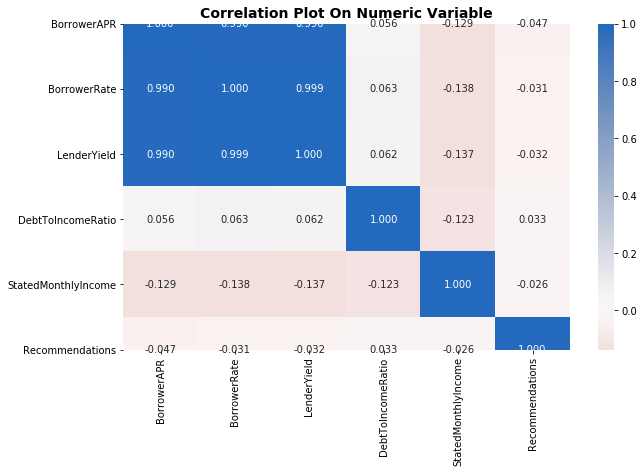

In [49]:
# correlation plot of numeric variables
plt.figure(figsize = [10, 6])
sb.heatmap(loan_support_df[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.title('Correlation Plot On Numeric Variable', fontsize=14, weight = "bold")
plt.show()

As we see there are three variables that are highly correlated with each other, they are; Borrower APR, Borrower Rate, and Lender Yield. The remaining there variables are not correlated neither with each other nor the other highly correlated variables, which tells us they might not be able to correctly predict our loan status outcome.

 Checking the relationship between the categorical variables

In [50]:
categoric_vars

['LoanStatus',
 'Occupation',
 'EmploymentStatus',
 'IsBorrowerHomeowner',
 'IncomeRange',
 'IncomeVerifiable']

In [51]:
# Creating employment_order_new
employment_order_new =['Not employed', 'Retired', 'Other','Self-employed', 'Employed', 'Full-time','Part-time','Not available'][::-1]

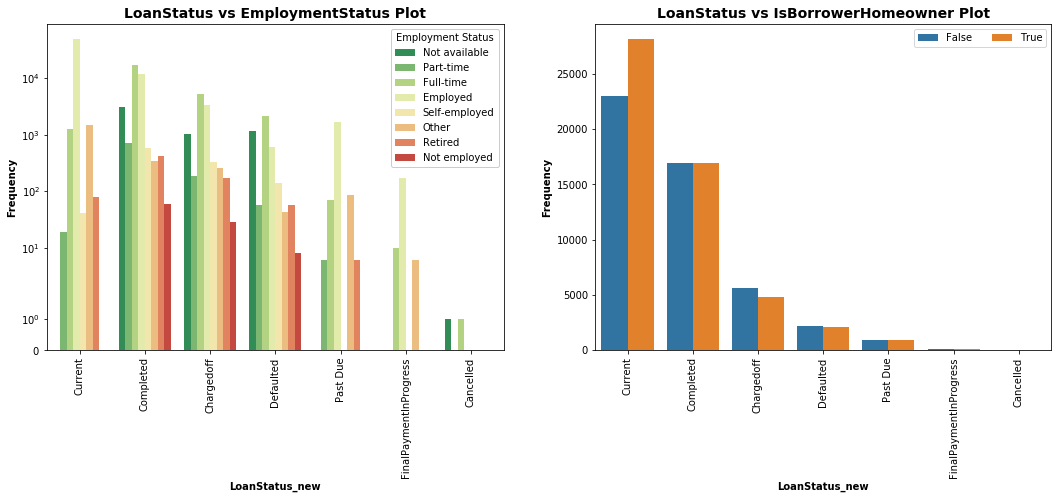

In [52]:
# Creating Clustered BarChart for the Categorical Variables
plt.figure(figsize = [18, 6])

# subplot 1: loanStatus vs EmploymentStatus
plt.subplot(1, 2, 1)
sb.countplot(data = loan_support_df, x = 'LoanStatus_new', hue = 'EmploymentStatus', palette = 'RdYlGn_r',
             order=loan_status_order_new, hue_order = employment_order_new)
plt.yscale('symlog')
plt.title('LoanStatus vs EmploymentStatus Plot', fontsize=14, weight="bold")
plt.ylabel('Frequency',fontsize=10, weight="bold")
plt.xlabel('LoanStatus_new',fontsize=10, weight="bold")
plt.xticks(rotation=90)
plt.legend(loc = 'upper right', ncol = 1, framealpha = 1, title = 'Employment Status')

# subplot 2: LoanStatus vs. IsBorrowerHomeowner
ax = plt.subplot(1, 2, 2)
sb.countplot(data = loan_support_df, x = 'LoanStatus_new', hue = 'IsBorrowerHomeowner', order=loan_status_order_new)
plt.title('LoanStatus vs IsBorrowerHomeowner Plot', fontsize=14, weight="bold")
plt.ylabel('Frequency',fontsize=10, weight="bold")
plt.xlabel('LoanStatus_new',fontsize=10, weight="bold")
plt.yscale('linear')
plt.xticks(rotation=90)
ax.legend(ncol = 2) # re-arrange legend to reduce overlapping

plt.show()

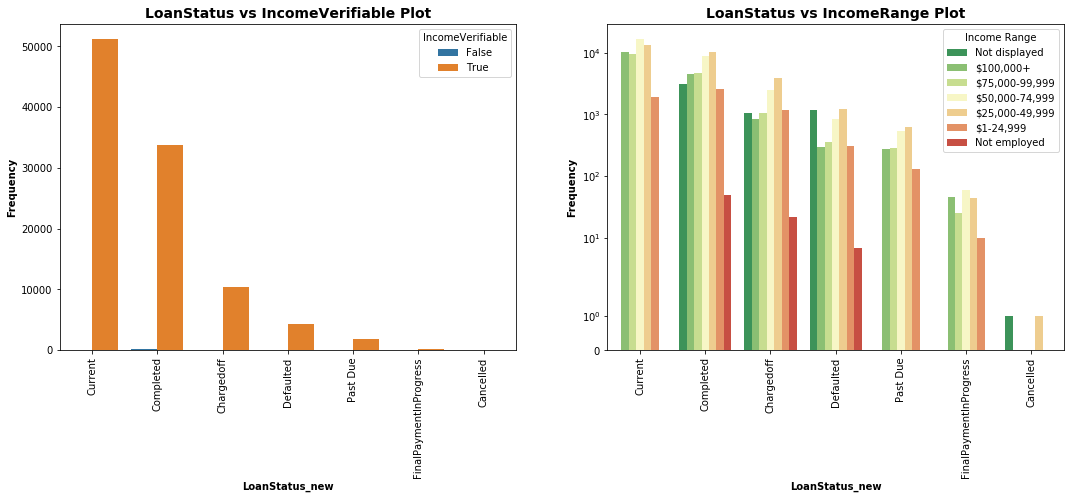

In [53]:
# subplot 1: loanStatus vs IncomeVerifiable
plt.figure(figsize = [18, 6])
plt.subplot(1, 2, 1)
sb.countplot(data = loan_support_df, x = 'LoanStatus_new', hue = 'IncomeVerifiable', order=loan_status_order_new)
plt.title('LoanStatus vs IncomeVerifiable Plot', fontsize=14, weight="bold")
plt.ylabel('Frequency',fontsize=10, weight="bold")
plt.xlabel('LoanStatus_new',fontsize=10, weight="bold")
plt.xticks(rotation=90)

# subplot 2: LoanStatus vs.IncomeRange
ax = plt.subplot(1, 2, 2)
sb.countplot(data = loan_support_df, x = 'LoanStatus_new', hue = 'IncomeRange',palette = 'RdYlGn_r',
             order=loan_status_order_new, hue_order= income_order_new)
plt.title('LoanStatus vs IncomeRange Plot', fontsize=14, weight="bold")
plt.ylabel('Frequency',fontsize=10, weight="bold")
plt.xlabel('LoanStatus_new',fontsize=10, weight="bold")
plt.yscale('symlog')
plt.xticks(rotation=90)
ax.legend(loc = 'upper right', ncol = 1, title = "Income Range") # re-arrange legend to reduce overlapping

plt.show()

From the  above visuals, we can easily see that the "Not Employed" borrowers appear in 3 classes, which are the Completed, Chargedoff, and Defaulted of `LoanStatus` classes,while the "Not displayed" borrowers appears in all LoanStatus classes except the "Cancelled" class. <br><br>
The employment status doesn't really determine your `LoanStatus` outcome. And being a home owner doesn't mean you wouldn't need a loan to sort out few things.

The more your incomes are verifiable to be true, the more likely you're going to get a loan and payback. All people with different income range applies for loan, with low earners seeking more for loan. 

### Exploring numeric variables vs categorical variables using variable of interest

#### Exploring the relationship between LoanStatus and DebtToIncomeRatio

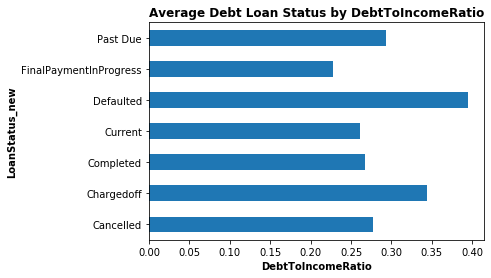

In [54]:
# Ploting Average Debt Loan Status by DebtToIncomeRatio

loan_means =loan_support_df.groupby('LoanStatus_new')['DebtToIncomeRatio'].mean()
loan_means.plot(kind='barh')
plt.title('Average Debt Loan Status by DebtToIncomeRatio',fontsize=12, weight="bold" )
plt.xlabel('DebtToIncomeRatio', fontsize=10, weight="bold")
plt.ylabel('LoanStatus_new', fontsize=10, weight="bold")
plt.show();

The plot above show that the majority of borrower's DebtToIncomeRatio are above average, which might indicates that borrowers should be able to payback their loans. The striking thing for me is that the Defaulted borrowers have a higher DebtToIncomeRatio far above the average.Why they defaulted is still surprising because they earn more than debt incurred.

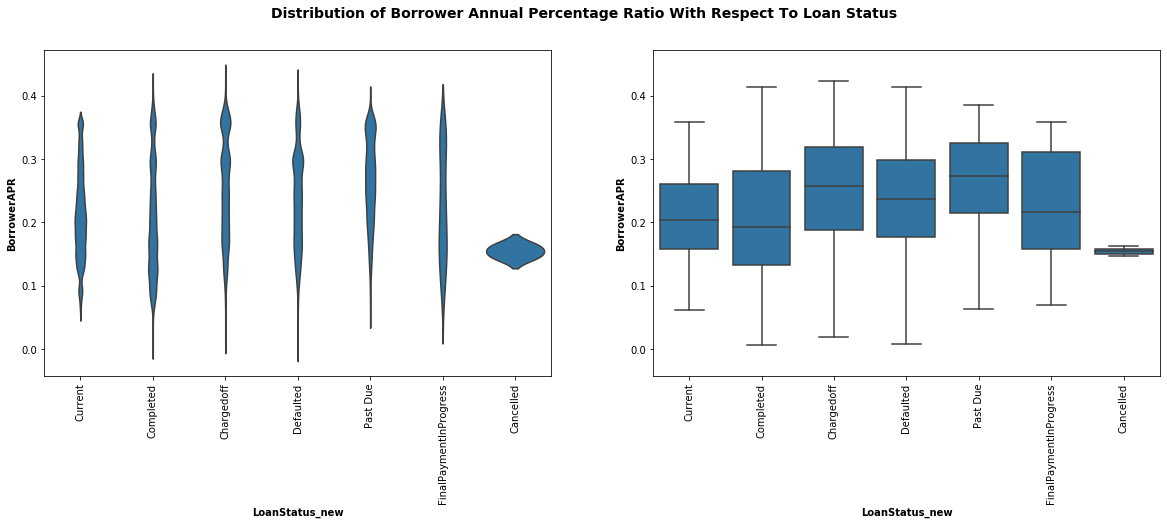

In [66]:
# Violin and Box Plot Comparison For LoanStatus vs BorrowerAPR

base_color = sb.color_palette()[0]

# The "inner" argument represents the datapoints in the violin interior. 
# It can take any value from {“box”, “quartile”, “point”, “stick”, None}
# If "box", it draws a miniature boxplot.


# TWO PLOTS IN ONE FIGURE
plt.figure(figsize = [20, 6])
base_color = sb.color_palette()[0]

# LEFT plot: violin plot
plt.subplot(1, 2, 1)
#Let's return the axes object
ax1 = sb.violinplot(data=loan_support_df, y='BorrowerAPR', x='LoanStatus_new', color=base_color, 
              inner=None, order = loan_status_order_new)
plt.suptitle('Distribution of Borrower Annual Percentage Ratio With Respect To Loan Status', fontsize=14, weight="bold")
plt.ylabel('BorrowerAPR',fontsize=10, weight="bold")
plt.xlabel('LoanStatus_new',fontsize=10, weight="bold")
plt.xticks(rotation=90)

# RIGHT plot: box plot
plt.subplot(1, 2, 2)
sb.boxplot(data=loan_support_df, x='LoanStatus_new', y='BorrowerAPR', color=base_color, order =loan_status_order_new)
plt.ylabel('BorrowerAPR',fontsize=10, weight="bold")
plt.xlabel('LoanStatus_new',fontsize=10, weight="bold")
plt.xticks(rotation=90);
plt.ylim(ax1.get_ylim()); # set y-axis limits to be same as left plot




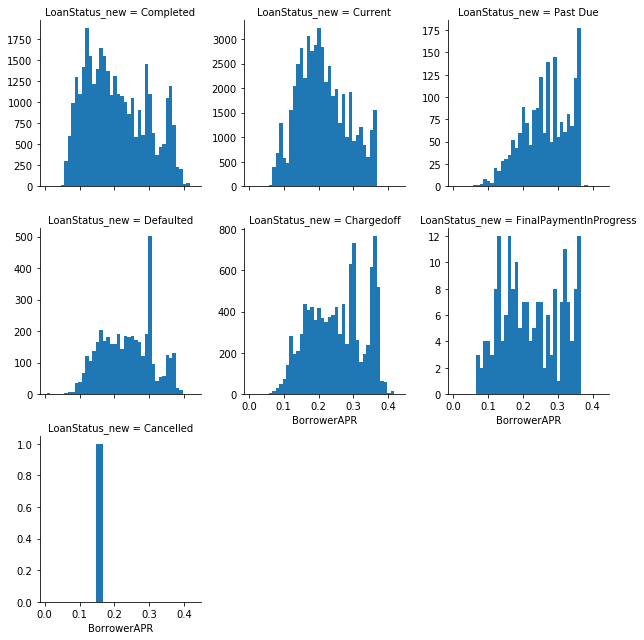

In [58]:
# Plot the Seaborn's FacetGrid for BorrowerAPR distribution with each `LoanStatus` classes 

bin_edges = np.arange(loan_support_df['BorrowerAPR'].min(), loan_support_df['BorrowerAPR'].max()+0.01, 0.01)
g = sb.FacetGrid(data = loan_support_df, col = 'LoanStatus_new',col_wrap=3, sharey=False)
g.map(plt.hist, "BorrowerAPR", bins = bin_edges);

Note that the "color" parameter was used here to make each box the same color. In order to provide a better comparison of the violin and box plots, a `ylim` expression has been added to the second plot to match the two plots' y-axis limits. The Axes object returned by `violinplot()` is assigned to a variable, `ax1` is used to programmatically obtain those limit values.<br><br>


One of the interesting things about the relationship between variables is that it isn't consistent. The violin plots shows that borrowers loan status for different classes tends to be biomodal in distribution. The box plot reveals the 'Past Due' class has the largest median and the "Cancelled" class having the smallest median. The box plot make it easier to see that the median displacement for "Past" Due classes are greater than the median distribution for all classes.

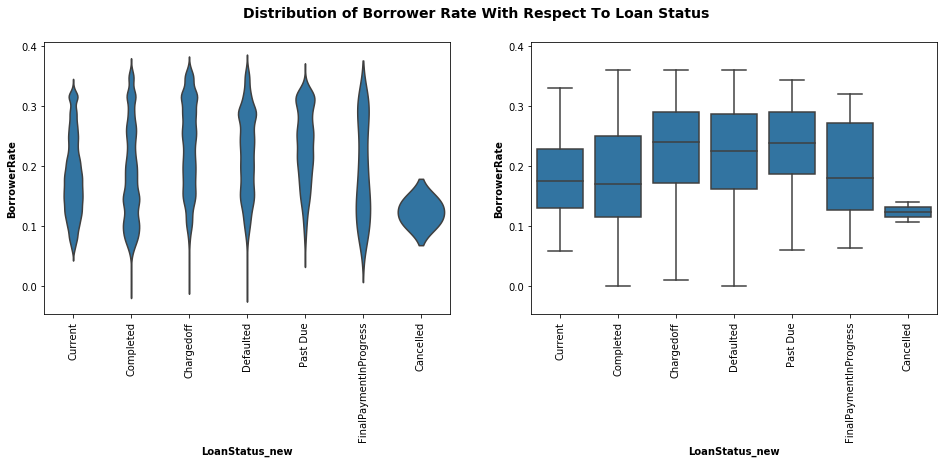

In [67]:
# Violin and Box Plot Comparison For LoanStatus vs BorrowerRate

base_color = sb.color_palette()[0]


# TWO PLOTS IN ONE FIGURE
plt.figure(figsize = [16, 5])
base_color = sb.color_palette()[0]

# LEFT plot: violin plot
plt.subplot(1, 2, 1)
#Let's return the axes object
ax1 = sb.violinplot(data=loan_support_df, y='BorrowerRate', x='LoanStatus_new', color=base_color, 
              inner=None, order = loan_status_order_new)
plt.suptitle('Distribution of Borrower Rate With Respect To Loan Status', fontsize=14, weight="bold")
plt.ylabel('BorrowerRate',fontsize=10, weight="bold")
plt.xlabel('LoanStatus_new',fontsize=10, weight="bold")
plt.xticks(rotation=90)

# RIGHT plot: box plot
plt.subplot(1, 2, 2)
sb.boxplot(data=loan_support_df, x='LoanStatus_new', y='BorrowerRate', color=base_color, order =loan_status_order_new)
plt.ylabel('BorrowerRate',fontsize=10, weight="bold")
plt.xlabel('LoanStatus_new',fontsize=10, weight="bold")
plt.xticks(rotation=90);
plt.ylim(ax1.get_ylim()); # set y-axis limits to be same as left plot


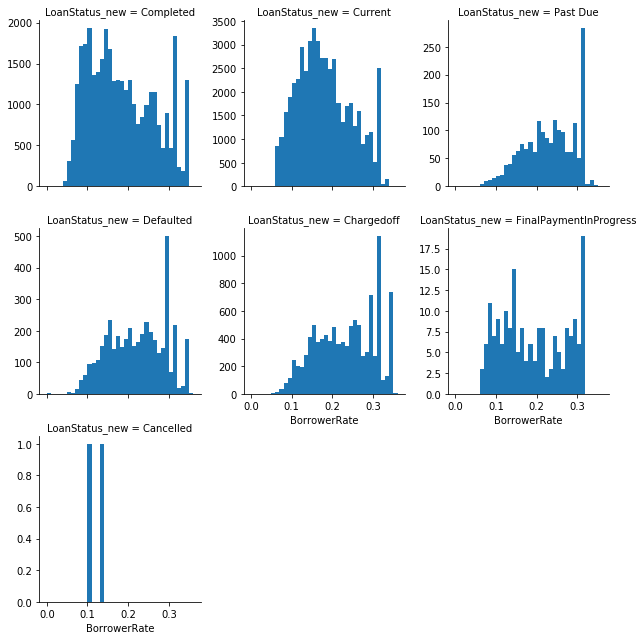

In [59]:
# Plotting the Seaborn's FacetGrid for BorrowerRate distribution with each `LoanStatus` classes

bin_edges = np.arange(loan_support_df['BorrowerRate'].min(), loan_support_df['BorrowerRate'].max()+0.01, 0.01)
g = sb.FacetGrid(data = loan_support_df, col = 'LoanStatus_new',col_wrap=3, sharey=False)
g.map(plt.hist, "BorrowerRate", bins = bin_edges);

The Violin and Facet Grid plots also shows that borrowers loan status for different classes tends to be biomodal in distribution, except the "Cancelled" class. The box plot reveals the 'Chargedoff' and 'Past Due' classes have the largest median distribution and the "Cancelled" class having the smallest median median distribution.

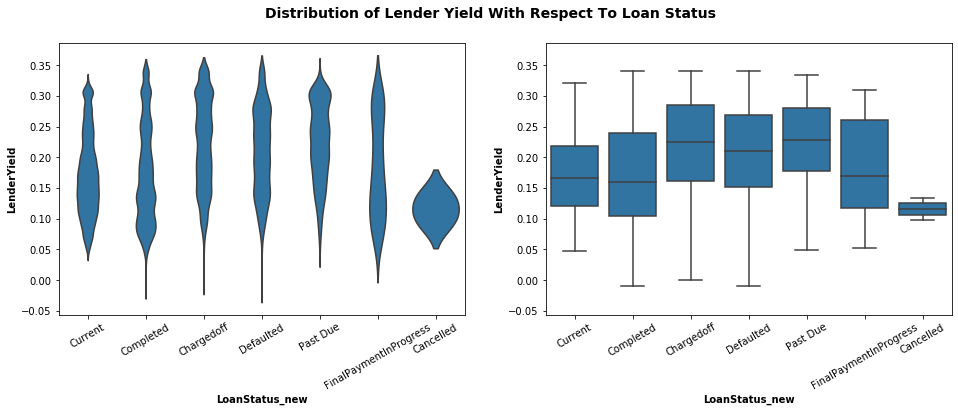

In [71]:
# Violin and Box Plot Comparison For LoanStatus vs LenderYield

base_color = sb.color_palette()[0]


# TWO PLOTS IN ONE FIGURE
plt.figure(figsize = [16, 5])
base_color = sb.color_palette()[0]

# LEFT plot: violin plot
plt.subplot(1, 2, 1)
#Let's return the axes object
ax1 = sb.violinplot(data=loan_support_df, y='LenderYield', x='LoanStatus_new', color=base_color, 
              inner=None, order = loan_status_order_new)
plt.suptitle('Distribution of Lender Yield With Respect To Loan Status', fontsize=14, weight="bold")
plt.ylabel('LenderYield',fontsize=10, weight="bold")
plt.xlabel('LoanStatus_new',fontsize=10, weight="bold")
plt.xticks(rotation=30)

# RIGHT plot: box plot
plt.subplot(1, 2, 2)
sb.boxplot(data=loan_support_df, x='LoanStatus_new', y='LenderYield', color=base_color, order =loan_status_order_new)
plt.ylabel('LenderYield',fontsize=10, weight="bold")
plt.xlabel('LoanStatus_new',fontsize=10, weight="bold")
plt.xticks(rotation=30);
plt.ylim(ax1.get_ylim()); # set y-axis limits to be same as left plot

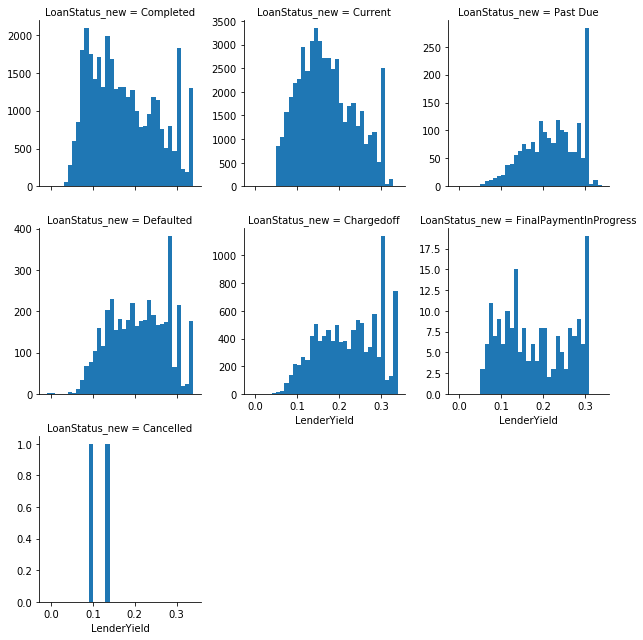

In [69]:
# Plotting the Seaborn's FacetGrid for LenderYield distribution with each `LoanStatus` classes

bin_edges = np.arange(loan_support_df['LenderYield'].min(), loan_support_df['LenderYield'].max()+0.01, 0.01)
g = sb.FacetGrid(data = loan_support_df, col = 'LoanStatus_new',col_wrap=3, sharey=False)
g.map(plt.hist, "LenderYield", bins = bin_edges);

There is a similar distribution pattern with 'BorrowerRate', where the Violin and Facet Grid plots also shows that borrowers loan status for different classes tends to be biomodal in distribution, except the "Cancelled" class. The box plot reveals the 'Chargedoff' and 'Past Due' classes have the largest median distribution and the "Cancelled" class having the smallest median median distribution.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> The `BorrowerAPR`, `BorrowerRate`, and `LenderYield` all show similar relationship with the `LoanStatus`, where the median displacement of borrowers with loan status lying withing "Past Due" class being greater than the median distribution for the remaining classes, except for the "Chargedoff" class under the `BorrowerRate` and `LenderYield` variables, having similar median distribution with "Past Due" class.<br><br> 
There's an interesting very large spike around 0.28 - 0.29 for the "Defaulted" class in the distribution for each of the three variables with respect to the `LoanStatus` variable.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> The Defaulted class seems to be surprising, where their Debt To Income Ratio is above the average of the entire borrowers.It is rational to think individuals than earn higher than their debt should be able to pay back their debt. Why they defaulted is still amazing.

## Multivariate Exploration

#### Exploring Loan Status Of Borrower with Their Monthly Income and Debt To Income Ratio

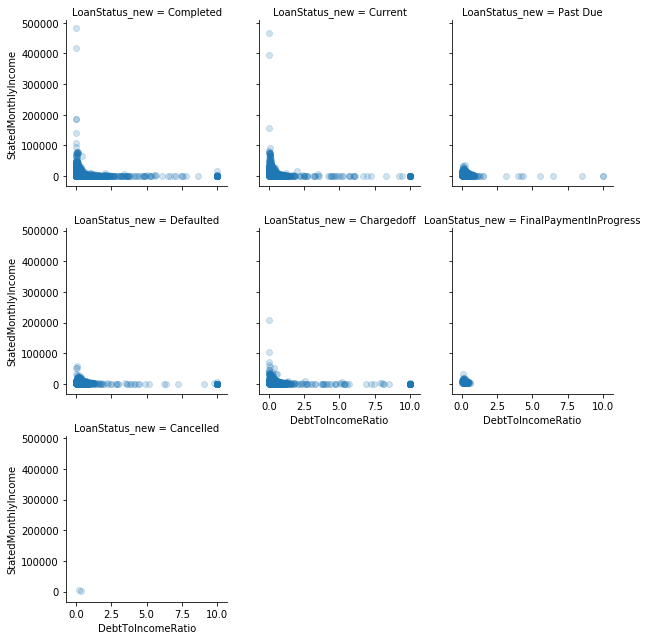

In [84]:
#Plotting the Seaborn's FacetGrid for 'DebtToIncomeRatio', and 'StatedMonthlyIncome' 
# distribution with each `LoanStatus` classes
g = sb.FacetGrid(data = loan_support_df, col = 'LoanStatus_new', size = 3, col_wrap = 3)
g.map(plt.scatter, 'DebtToIncomeRatio', 'StatedMonthlyIncome', alpha = 1/5);


Once again the above plot shows that the majority of borrowers are low earners, with only 3 classes having minute earners beyond the 100K dollars.  The plot also show that most are having "DebtToIncomeRatio" between 0.0 - 0.25.

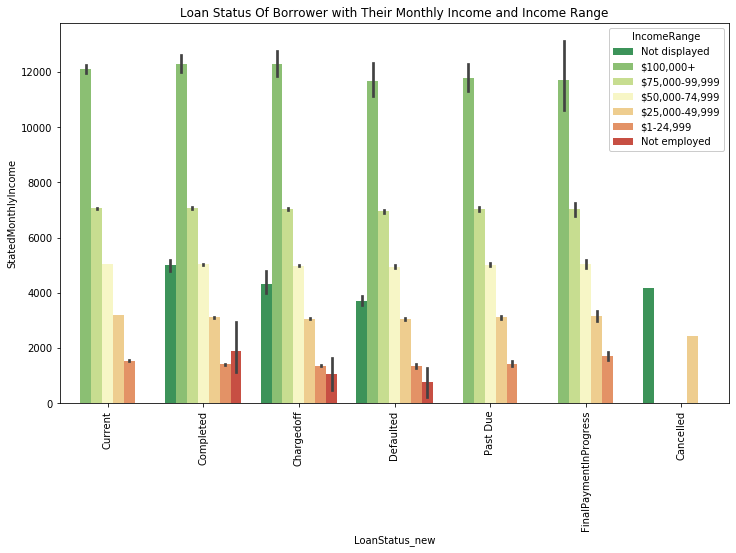

In [85]:
# Investigating the relationship between Loan Status_new, Stated Monthly Income and Income Range

plt.figure(figsize=[12,7])
ax = sb.barplot(data = loan_support_df, x = 'LoanStatus_new', y = 'StatedMonthlyIncome',
                order = loan_status_order_new, hue = 'IncomeRange', hue_order = income_order_new, palette = 'RdYlGn_r')
ax.legend(loc = 'upper right', ncol = 1, framealpha = 1, title = 'IncomeRange')
plt.title('Loan Status Of Borrower with Their Monthly Income and Income Range')
plt.xticks(rotation=90);

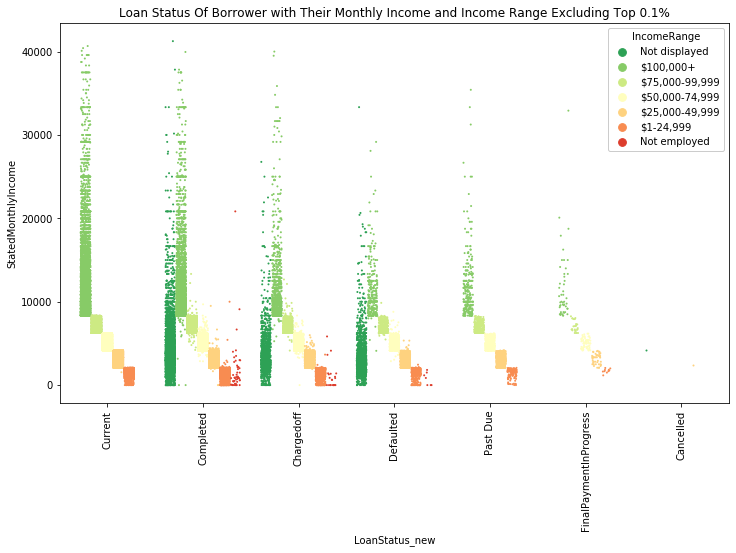

In [86]:
# Investigating the relationship between Loan Status_new, Stated Monthly Income and Income Range
# Excluding top 0.1%

plt.figure(figsize=[12,7])
ax = sb.stripplot(data = loan_support_df.query('StatedMonthlyIncome < StatedMonthlyIncome.quantile(0.999)'),
                  x = 'LoanStatus_new', y = 'StatedMonthlyIncome',order = loan_status_order_new, 
                  hue = 'IncomeRange', hue_order = income_order_new, palette = 'RdYlGn_r',
               size =  2, jitter = 0.35, dodge = True)
ax.legend(loc = 'upper right', ncol = 1, framealpha = 1, title = 'IncomeRange')
plt.title('Loan Status Of Borrower with Their Monthly Income and Income Range Excluding Top 0.1%')
plt.xticks(rotation=90);

The above plot seems to confirm with our observation during the univariate exploration, whereby the Stated Monthly Income of debtors and their IncomeRange matches in terms of their LoanStatus. The fact that the income range that falls between 25K dollars to 100K dollars appears in almost all the LoanStatus classes confirm this. With 0 - 25K dollars appearing in all classes.

So I'll try to find the relationship between IncomeVerifiable, Stated Monthly Income and Income Range, perhaps to get more insight

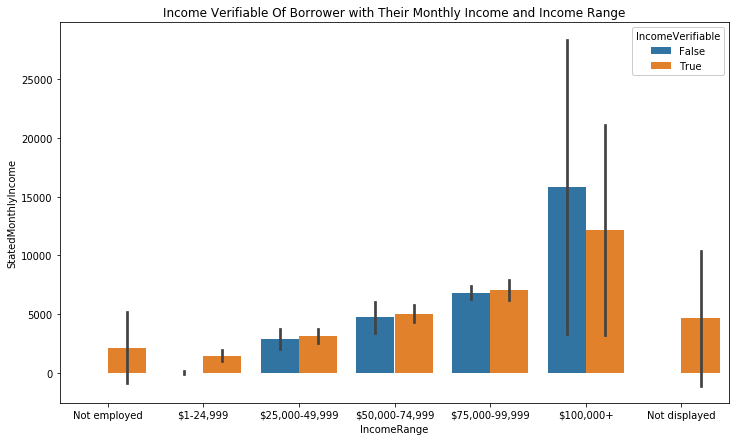

In [103]:
# Investigating the relationship between IncomeVerifiable, Stated Monthly Income and Income Range
# setting 'order' parameter as 'income_order_new'
plt.figure(figsize=[12,7])
ax = sb.barplot(data = loan_support_df, x = 'IncomeRange', y = 'StatedMonthlyIncome',
                hue = 'IncomeVerifiable', order = income_order_new[::-1], ci ='sd')
ax.legend(loc = 'upper right', ncol = 1, framealpha = 1, title = 'IncomeVerifiable')
plt.title('Income Verifiable Of Borrower with Their Monthly Income and Income Range');

It can be seen from the above that, income are verified to be either true or false for income in range 25K to 100K, while the others are all verified to be true.


> The Multivariate exploration seems to inform me that the major variable that could predict the loan status outcome; are the `BorrowerAPR`, `BorrowerRate`, and the `LenderYield` .


> The most interesting about the Multivariate exploration is that Borrowers Income are verified as either true or false, yet those who income are verified to be false were still giving loans. There are as many debtors whose incomes are verified to be true which doesn't tally with their stated income as well as there are as many debtors whose incomes are verified to be false which doesn't match thier stated income. The majority of borrowers are earning between 1 - 100K dollars, only few are earning beyond 100K.

<a id='conclusions'></a>
## Conclusions
> From the exploratory analysis and the visuals, I was able to deduce the following;
- The `BorrowerAPR`, `BorrowerRate` and `LenderYield` variables are highly correlated, and increase in the value of one increases the value of the other.
- The distribution of the `BorrowerAPR`, `BorrowerRate` and `LenderYield` variables with each class of the `LoanStatus` variable are bimodal, except for "Cancelled" class.
- The average `DebtToIncomeRatio` of almost all classes of borrowers lies between 0 - 0.25 less than the average DebtToIncomeRatio which is 0.277.
- The employment status doesn't necessarily determine your loan status outcome.
- The majority of borrowers are earning between 1 - 100K dollars, only few are earning beyond 100K.
- The `LoanStatus` of borrowers can be highly predicted by `BorrowerAPR`, `BorrowerRate` and `LenderYield`, followed closely by the `DebtToIncomeRatio`, and `StatedMonthlyIncome`
- The high positive degree of correlation that exist between `Borrower Annual Percentage Rate, APR`, `Borrower Rate`, and `Lender Yield`, in addition to them having more or less similar distribution with the `Loan Status` variable shows the degree of their reliabilty to predict the Loan Status Outcome.
